<a href="https://colab.research.google.com/github/ltittle/QNC/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

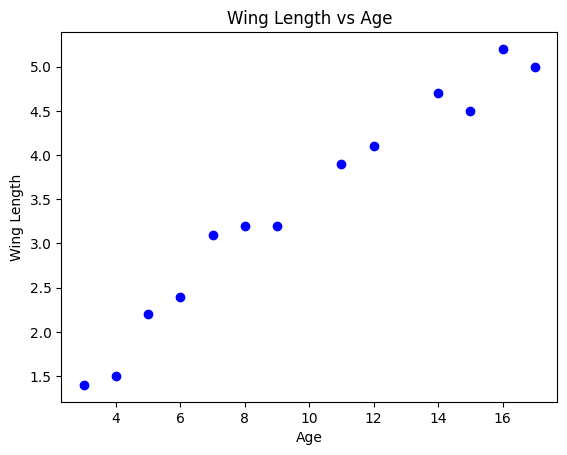

In [1]:
#Plot relationship between age and wing length

import matplotlib.pyplot as plt

# Data
age = [3,4,5,6,7,8,9,11,12,14,15,16,17]
wing_length = [1.4,1.5,2.2,2.4,3.1,3.2,3.2,3.9,4.1,4.7,4.5,5.2,5.0]

plt.scatter(age, wing_length, color='blue')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Wing Length vs Age')
plt.show()

#looks like positive correlation between wing length and age



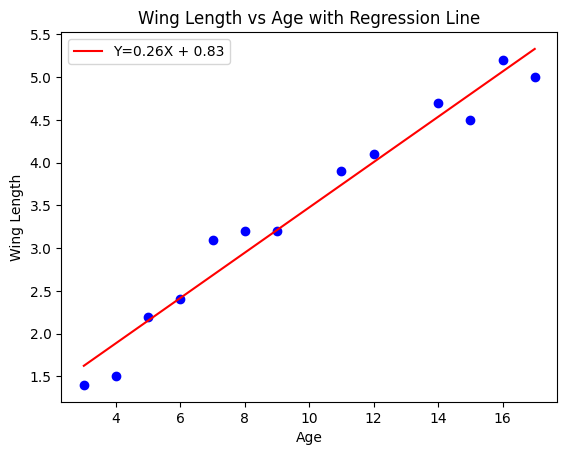

In [2]:
#Calculate and plot regression line
import numpy as np
from scipy import stats

# Linear regression - we're modeling the causal relationship between the x,y variables - so how much does y change per unit x (how much does wing length as age increases)
# the line starts at 0 (when x = 0). The regression is trying to minimize the differences between the y values you observe and the predicted y values on the line (residuals). So it's balancing the points above and below the line - slope tells you kind of the rate of growth, r value tells you how close the points are aligned, the p value tells you if the slope is real or just chance, and the standar error tells you how precisely we know the slope.

#The code is returning 5 values at the same time (called tuple unpacking)
slope, intercept, r_value, p_value, std_err = stats.linregress(age, wing_length)

# Regression line - x loops over each age value - and for each "x" it calculates the slope * x * intercept (predicted wing length for each age). The result is a list of predicted wing lengths that correspond to age. The reg_line variable draws the line.
reg_line = [slope*x + intercept for x in age]

plt.scatter(age, wing_length, color='blue')
plt.plot(age, reg_line, color='red', label=f'Y={slope:.2f}X + {intercept:.2f}')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Wing Length vs Age with Regression Line')
plt.legend()
plt.show()


In [3]:
#Can you reject the null hypothesis or default assumption that age does not affect wing length (i.e. there is no relationship).
print("p-value:", p_value)
#If p < 0.05, reject H₀ → there is a significant relationship between Age and Wing Length.

#We reject the null hypothesis because there is a clear positive relationship between age and wing length.

p-value: 3.0097431724571258e-09


In [4]:
#Plot confidence intervals on the slope of the regression.
# The CI's give you the range of plausible values for the slope in this case. We got a 95% CI so this means that if we kept repeating this experiment - 95% of the time the true slope would be within this interval.
from scipy.stats import t

n = len(age)
alpha = 0.05
t_val = t.ppf(1-alpha/2, df=n-2)
ci_lower = slope - t_val*std_err
ci_upper = slope + t_val*std_err

print(f"95% CI for slope: ({ci_lower:.2f}, {ci_upper:.2f})")


95% CI for slope: (0.23, 0.30)


In [5]:
#Plot r2; this tells you how well your regression line explains the variation in the data. If r2 is 0, the regression doesn't explain the variation and the line isn't going to help. If it's 1, it explains all the variation and perfectly fits your data.
#So our R2 explains most of the variation in our wing length data - almost perfectly predicting wing length.
r_squared = r_value**2
print("R²:", r_squared)


R²: 0.9633822518042855


In [6]:
#Plot Pearson's r - correlation coefficient between 2 variables - so it's measuring how strongly and in which direction X and Y are related linearly (between -1 and1). Since ours is 0.98 - there is a strong positive relationship. The points strongly hug the regression line.
print("Pearson's r:", r_value)


Pearson's r: 0.9815203776816279


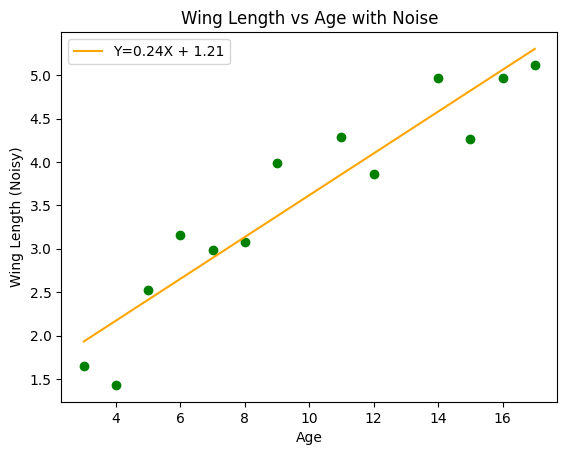

Noisy data slope: 0.2407668340053702
Noisy data R²: 0.8856670963008262
Noisy data Pearson's r: 0.9410988770054006


In [7]:
#Add some noise - this seems to shift the line (slope, intercept, etc.) this will change the R2, Pearson's R, and p-value. So the data no longer "fits" the line as well.
np.random.seed(42)
noise = np.random.normal(0, 0.5, size=len(wing_length))
wing_length_noisy = np.array(wing_length) + noise

# Recalculate regression
slope_noisy, intercept_noisy, r_noisy, p_noisy, std_err_noisy = stats.linregress(age, wing_length_noisy)
reg_line_noisy = slope_noisy*np.array(age) + intercept_noisy

plt.scatter(age, wing_length_noisy, color='green')
plt.plot(age, reg_line_noisy, color='orange', label=f'Y={slope_noisy:.2f}X + {intercept_noisy:.2f}')
plt.xlabel('Age')
plt.ylabel('Wing Length (Noisy)')
plt.title('Wing Length vs Age with Noise')
plt.legend()
plt.show()

print("Noisy data slope:", slope_noisy)
print("Noisy data R²:", r_noisy**2)
print("Noisy data Pearson's r:", r_noisy)
